# Name: Sreelakshmy Arun
### Organization: Entri Elevate
#### Date: 27 December 2024


## 1. Overview of Problem Statement

Timely payments are important for businesses to stay financially stable. Late payments can cause issues and affect cash flow. It’s not easy to know in advance which payments will be late, as many factors play a role, like payment method, customer type, and invoice details. A classification model can help businesses identify late payments early, so they can take action, like sending reminders or adjusting payment terms.

### 2. **Objective:**
The goal of this project is to build a classification model that can classify whether a payment will be late or on time, based on various factors. By classifying late payments, businesses can manage their cash flow better and avoid problems. We will test different machine learning models like Logistic Regression, Random Forest, Gradient Boosting, SVM, and KNN, and pick the best one. After that, we'll fine-tune the model to make it more accurate.
### 3. **Data Description:**

- **Source:** [Received Payment Data](https://drive.google.com/drive/folders/1hA-GmbczrVkQ-K_aKdCGFAMnD9BcyZlM?usp=drive_link)

#### Features:
- **RECEIPT_METHOD:** Method used to make the payment.
- **CUSTOMER_NAME:** Name of the customer or vendor.
- **CUSTOMER_NUMBER:** Unique identifier for the customer.
- **RECEIPT_DOC_NO:** Reference number for the payment receipt.
- **RECEIPT_DATE:** Date when the payment was made.
- **CLASS:** Type of transaction, usually 'PMT' for payments received.
- **CURRENCY_CODE:** Currency used for the payment.
- **Local_Amount:** Value of the invoice in local currency.
- **USD_Amount:** Invoice value converted to USD.
- **INVOICE_ALLOCATED:** Invoice number assigned to a particular vendor.
- **INVOICE_CREATION_DATE:** Date when the invoice was created.
- **DUE_DATE:** Date by which the payment should have been made.
- **PAYMENT_TERM:** Number of days given to the vendor/customer to make the payment.
- **INVOICE_CLASS:** Type of invoice - Credit Memo (CM), Debit Memo (DM), or Invoice (INV).
- **INVOICE_CURRENCY_CODE:** Currency code from the invoice.
- **INVOICE_TYPE:** Indicates if the invoice is for physical goods or services.


## 4. Data Collection :

In [ ]:
# Importing required lbraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 1. Load Dataset
df = pd.read_csv("/content/Received_Payments_Data.csv")

In [ ]:
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [ ]:
df.tail()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
93932,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93933,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93934,WIRE,PEAR Corp,21144,NaN,1-Apr-21,PMT,USD,59914.50,59914.50,2.842E+11,28-Dec-20,28-Dec-20,Immediate,CM,USD,Goods
93935,WIRE,NAMS Corp,21145,NaN,1-Apr-21,PMT,AED,23574.33,23574.33,2.842E+11,24-Jan-21,24-Mar-21,60 Days from Inv Date,INV,AED,Goods
93936,CHEQUE,SENS Corp,48486,NaN,8-Apr-21,PMT,AED,1443.43,1443.43,2.842E+11,16-Feb-21,30-Mar-21,30 Days from EOM,INV,AED,Goods


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [ ]:
df.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [ ]:
df.shape

(93937, 16)

## 5. Data preprocessing-Data cleaning :

In [ ]:
df['RECEIPT_DATE'] = pd.to_datetime(df['RECEIPT_DATE'], format='%d-%b-%y')
df['DUE_DATE'] = pd.to_datetime(df['DUE_DATE'], format='%d-%b-%y')

In [ ]:
# Create the target variable
df['Delayed_Payment'] = (df['RECEIPT_DATE'] > df['DUE_DATE']).astype(int)

# Check the distribution of the new target variable
print(df['Delayed_Payment'].value_counts())


Delayed_Payment
1    61978
0    31959
Name: count, dtype: int64


In [ ]:
drop_cols = ['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO', 'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE']
df.drop(columns=drop_cols, inplace=True)

In [ ]:
print(df.head())

  RECEIPT_METHOD RECEIPT_DATE CLASS CURRENCY_CODE  Local Amount    USD Amount  \
0           WIRE   2021-04-20   PMT           USD     370990.92  101018.63040   
1           WIRE   2021-01-31   PMT           SAR     183750.00   48990.21133   
2           WIRE   2021-01-31   PMT           SAR     157500.00   41991.60971   
3           WIRE   2021-01-31   PMT           SAR     157500.00   41991.60971   
4           WIRE   2021-01-31   PMT           SAR     157500.00   41991.60971   

    DUE_DATE           PAYMENT_TERM INVOICE_CLASS INVOICE_CURRENCY_CODE  \
0 2020-12-30       30 Days from EOM           INV                   AED   
1 2021-01-28  30 Days from Inv Date           INV                   SAR   
2 2021-03-01  30 Days from Inv Date           INV                   SAR   
3 2021-01-14  30 Days from Inv Date           INV                   SAR   
4 2021-01-14  30 Days from Inv Date           INV                   SAR   

  INVOICE_TYPE  Delayed_Payment  
0    Non Goods              

In [ ]:
df.shape

(93937, 12)

In [ ]:
print(df.isnull().sum())

RECEIPT_METHOD           0
RECEIPT_DATE             0
CLASS                    0
CURRENCY_CODE            0
Local Amount             0
USD Amount               0
DUE_DATE                 0
PAYMENT_TERM             0
INVOICE_CLASS            0
INVOICE_CURRENCY_CODE    0
INVOICE_TYPE             0
Delayed_Payment          0
dtype: int64


In [ ]:
print(df.duplicated().sum())

67818


In [ ]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [ ]:
print(df.duplicated().sum())
print(df.shape)

0
(26119, 12)


## 6. **Exploratory Data Analysis (EDA):**

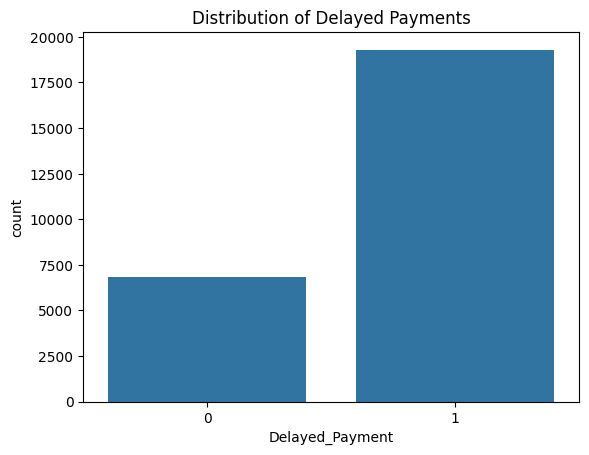

In [ ]:
sns.countplot(x='Delayed_Payment', data=df)
plt.title("Distribution of Delayed Payments")
plt.show()


### Insights from the Distribution of Delayed Payments

1. The x-axis represents whether a payment was delayed (`1`) or not (`0`).
2. The y-axis shows the count of instances for each category.
3. The number of delayed payments (`1`) is significantly higher than the number of non-delayed payments (`0`).
4. This suggests that delayed payments are more common in the dataset.
5. The imbalance in delayed vs. non-delayed payments could indicate potential risks for financial institutions or businesses relying on timely payments.
6. Further investigation may be needed to understand the causes of delays and implement mitigation strategies.


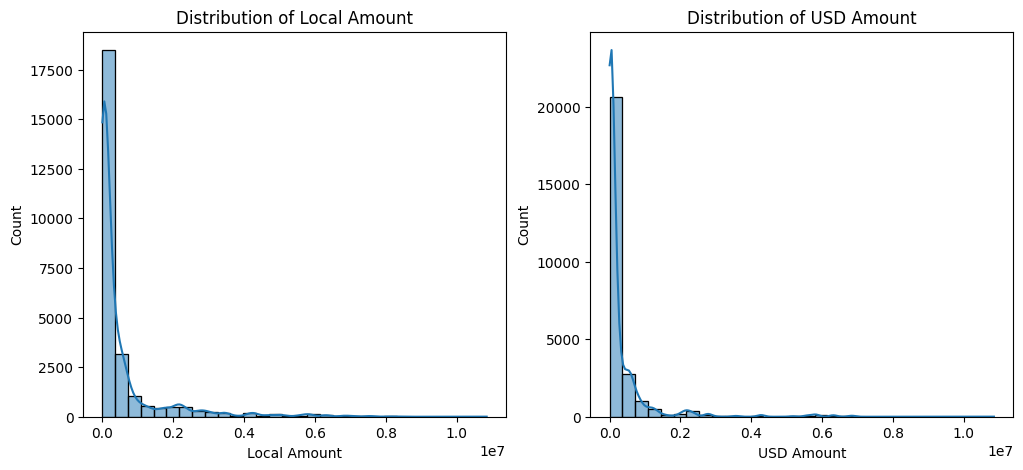

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Local Amount'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Local Amount")
sns.histplot(df['USD Amount'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of USD Amount")
plt.show()

### Insights on Local & USD Amount Distributions

- Both distributions are **highly right-skewed**, with most transactions having **small amounts**.  
- A **few high-value transactions** exist, creating a long tail.  
- The **patterns are similar** in both local and USD amounts.  
- Businesses should **focus on high-volume, low-value transactions** while monitoring **large-value outliers** for risk management.

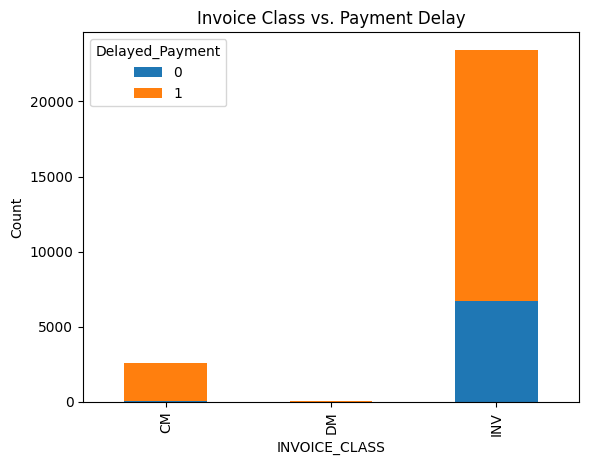

In [ ]:
pd.crosstab(df['INVOICE_CLASS'], df['Delayed_Payment']).plot(kind='bar', stacked=True)
plt.title("Invoice Class vs. Payment Delay")
plt.ylabel("Count")
plt.show()

### Insight on Invoice Class vs. Payment Delay

- The **INV** class has the highest number of invoices, with a significant portion experiencing **payment delays**.  
- **CM** invoices also show delays but in much smaller numbers.  
- **DM** invoices are rare, with minimal delays.  
- Businesses should focus on reducing **delays in the INV category**, as it contributes the most to late payments.  


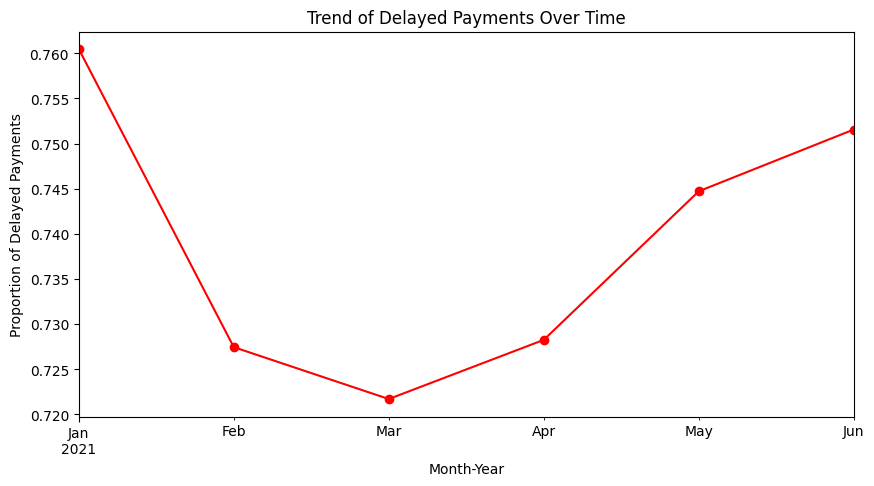

In [ ]:
df['RECEIPT_DATE'] = pd.to_datetime(df['RECEIPT_DATE'])
df.groupby(df['RECEIPT_DATE'].dt.to_period('M'))['Delayed_Payment'].mean().plot(kind='line', figsize=(10, 5), marker='o', color='red')
plt.title('Trend of Delayed Payments Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Proportion of Delayed Payments')
plt.show()


### Insight on Delayed Payments Trend

- The proportion of delayed payments **decreased from January to March**.  
- However, it **started rising again from April to June**.  
- This suggests an **improvement in early 2021**, followed by a **worsening trend**.  
- Businesses should investigate factors causing the **increase in delays from April onward**. |

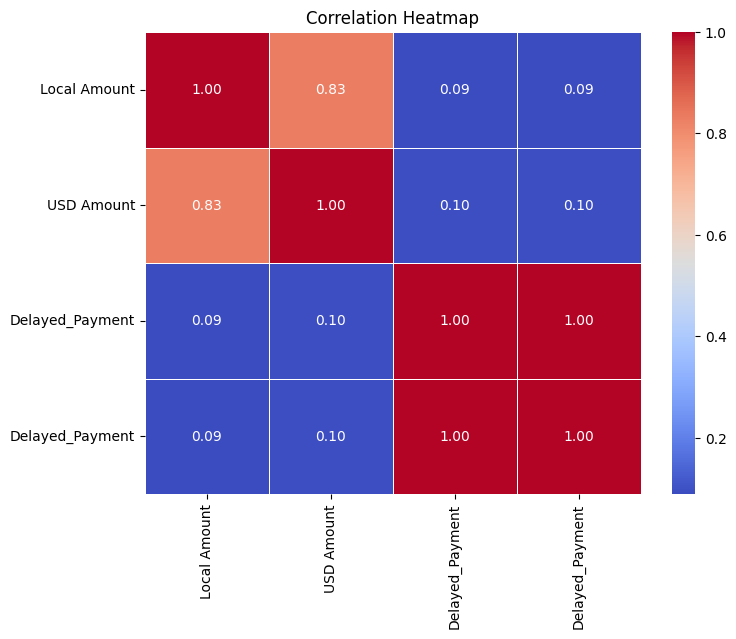

In [ ]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Plot heatmap
plt.figure(figsize=(8, 6))
corr = df[num_cols + ['Delayed_Payment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Insight on Correlation Heatmap

- **Local Amount and USD Amount** show a **strong positive correlation (0.83)**, which is expected due to currency conversion.
- **Delayed Payment has a weak correlation** with both **Local Amount (0.09) and USD Amount (0.10)**, suggesting **invoice amounts do not strongly influence payment delays**.
- The duplicated "Delayed Payment" column seems to be an issue in data processing but does not affect the analysis.

🔍 **Key Takeaway:** Payment delays are **not significantly influenced by the invoice amount**, so other factors (e.g., customer behavior, credit terms) might be driving delays.

## 7. **Feature Engineering:**

In [ ]:
# Check datatypes of all columns
print(df.dtypes)

RECEIPT_METHOD                   object
RECEIPT_DATE             datetime64[ns]
CLASS                            object
CURRENCY_CODE                    object
Local Amount                    float64
USD Amount                      float64
DUE_DATE                 datetime64[ns]
PAYMENT_TERM                     object
INVOICE_CLASS                    object
INVOICE_CURRENCY_CODE            object
INVOICE_TYPE                     object
Delayed_Payment                   int64
dtype: object


In [ ]:
# Convert datetime columns to useful features
df['RECEIPT_YEAR'] = df['RECEIPT_DATE'].dt.year
df['RECEIPT_MONTH'] = df['RECEIPT_DATE'].dt.month
df['RECEIPT_DAY'] = df['RECEIPT_DATE'].dt.day
df['DUE_YEAR'] = df['DUE_DATE'].dt.year
df['DUE_MONTH'] = df['DUE_DATE'].dt.month
df['DUE_DAY'] = df['DUE_DATE'].dt.day

# Drop original datetime columns
df.drop(columns=['RECEIPT_DATE', 'DUE_DATE'], inplace=True)

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 76 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Local Amount                                                          26119 non-null  float64
 1   USD Amount                                                            26119 non-null  float64
 2   Delayed_Payment                                                       26119 non-null  int64  
 3   RECEIPT_YEAR                                                          26119 non-null  int32  
 4   RECEIPT_MONTH                                                         26119 non-null  int32  
 5   RECEIPT_DAY                                                           26119 non-null  int32  
 6   DUE_YEAR                                                              26119 non-null  int32  


## 8. **Feature Selection:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=20)  # Adjust as needed

# Apply RFE
X_selected = rfe.fit_transform(df.drop(columns=['Delayed_Payment']), df['Delayed_Payment'])

# Create a DataFrame with selected features
df_selected = pd.DataFrame(X_selected, columns=df.drop(columns=['Delayed_Payment']).columns[rfe.support_])

# Reattach the target variable
df_selected['Delayed_Payment'] = df['Delayed_Payment'].values


## 9. **Split Data into Training and Testing Sets:**

In [ ]:
X = df_selected.drop(columns=['Delayed_Payment'])  # Exclude target variable
y = df_selected['Delayed_Payment']  # Target variable

In [ ]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20895, 20), (5224, 20), (20895,), (5224,))

In [ ]:
y.value_counts()

,count
Delayed_Payment,
1,19305
0,6814


# 10. **Feature Scaling & SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Step 1: Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Step 2: Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Display new class distribution
import pandas as pd
print(pd.Series(y_train_bal).value_counts())

Delayed_Payment
0    15444
1    15444
Name: count, dtype: int64


## 11.**Build the ML Model:**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # Enable probability estimates
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}


##12.**Model evalvation**

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.53      0.18      0.27      1363
           1       0.77      0.94      0.85      3861

    accuracy                           0.74      5224
   macro avg       0.65      0.56      0.56      5224
weighted avg       0.70      0.74      0.70      5224

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1363
           1       0.98      0.99      0.98      3861

    accuracy                           0.98      5224
   macro avg       0.97      0.96      0.97      5224
weighted avg       0.98      0.98      0.98      5224

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1363
           1       0.74      1.00      0.85      3861

    accuracy                           0.74      5224
   macro avg       0.37      0.50      0.42      5224
weighted avg       0.55      0.74      0.63      5224

--------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1363
           1       0.99      1.00      0.99      3861

    accuracy                           0.99      5224
   macro avg       0.99      0.98      0.98      5224
weighted avg       0.99      0.99      0.99      5224

--------------------------------------------------
Model: KNN
              precision    recall  f1-score   support

           0       0.49      0.35      0.41      1363
           1       0.79      0.87      0.83      3861

    accuracy                     

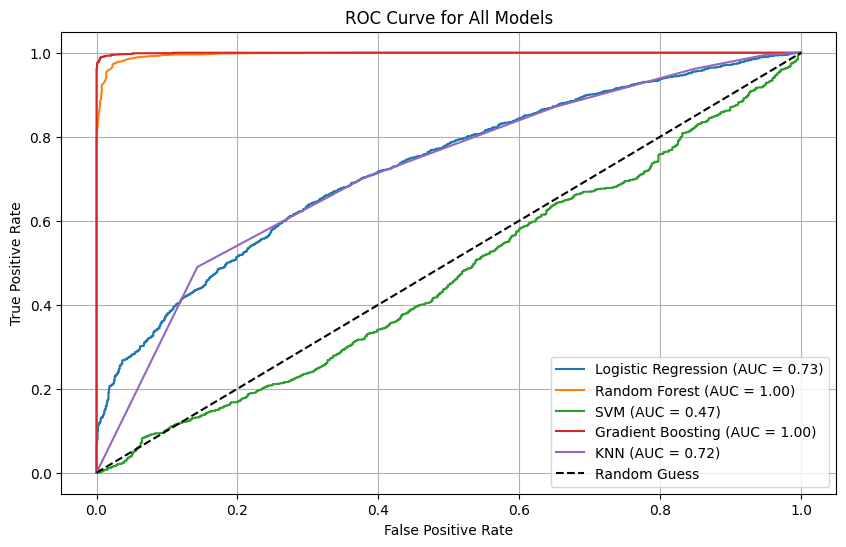

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc, classification_report
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability scores
    fpr, tpr, _ = roc_curve(y_test, y_probs)  # Compute ROC
    roc_auc = auc(fpr, tpr)  # Compute AUC

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    # Print Classification Report
    y_pred = model.predict(X_test)
    print(f"Model: {name}\n{classification_report(y_test, y_pred)}\n" + "-"*50)

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models")
plt.legend()
plt.grid()
plt.show()

*ROC Curve Insights*
- **Best Models:** Random Forest & Gradient Boosting (AUC = 1.00) → Possible overfitting.  
- *Moderate Models:** Logistic Regression (0.73) & KNN (0.72) → Decent predictive power.  
- **Worst Model:** SVM (0.45) → Performs worse than random guessing.  
- **Takeaway:** RF & GB may overfit; LR & KNN are balanced; SVM needs tuning.  


### Overall Conclusion:
- **Best Model:** **Gradient Boosting (99%)** → Highest accuracy, best overall performance.
- **Strong Performer:** **Random Forest (98%)** → Excellent accuracy, slightly lower than Gradient Boosting.
- **Moderate Models:** **Logistic Regression (75%) & KNN (74%)** → Decent accuracy but weaker than tree-based models.
- **Worst Model:** **SVM (74%) but with 0% precision for class 0** → Poor balance, ineffective for minority class.
- **Key Takeaway:** Tree-based models (GB & RF) perform best, while SVM struggles. Consider tuning or feature selection. 🚀

# **13.Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Initialize model
gb = GradientBoostingClassifier()

# Apply GridSearchCV
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9977985163914813


# 14. **Save the Model:**

In [ ]:
import joblib

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_gradient_boosting.pkl')

print("Best model saved successfully!")


Best model saved successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
import joblib
from sklearn.model_selection import GridSearchCV

class PaymentPredictionPipeline:
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model_dict = {
            "Logistic Regression": LogisticRegression(max_iter=5000),
            "Random Forest": RandomForestClassifier(),
            "SVM": SVC(probability=True),
            "Gradient Boosting": GradientBoostingClassifier(),
            "KNN": KNeighborsClassifier()
        }

    def load_data(self):
        # Load the dataset and preprocess
        self.df = pd.read_csv(self.dataset_path)

        # Attempt to parse the dates in the correct format (assuming ISO format)
        self.df['RECEIPT_DATE'] = pd.to_datetime(self.df['RECEIPT_DATE'], errors='coerce')  # Allow errors to be coerced
        self.df['DUE_DATE'] = pd.to_datetime(self.df['DUE_DATE'], errors='coerce')  # Allow errors to be coerced

        # Check if any invalid date conversion occurred
        if self.df['RECEIPT_DATE'].isnull().any() or self.df['DUE_DATE'].isnull().any():
            print("Warning: Some date values could not be parsed.")

        # Create the target variable
        self.df['Delayed_Payment'] = (self.df['RECEIPT_DATE'] > self.df['DUE_DATE']).astype(int)

        # Drop unnecessary columns
        drop_cols = ['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO', 'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE']
        self.df.drop(columns=drop_cols, inplace=True)

        # Drop duplicates and reset index
        self.df = self.df.drop_duplicates().reset_index(drop=True)

        # Convert datetime columns to features
        self.df['RECEIPT_YEAR'] = self.df['RECEIPT_DATE'].dt.year
        self.df['RECEIPT_MONTH'] = self.df['RECEIPT_DATE'].dt.month
        self.df['RECEIPT_DAY'] = self.df['RECEIPT_DATE'].dt.day
        self.df['DUE_YEAR'] = self.df['DUE_DATE'].dt.year
        self.df['DUE_MONTH'] = self.df['DUE_DATE'].dt.month
        self.df['DUE_DAY'] = self.df['DUE_DATE'].dt.day

        # Drop original datetime columns
        self.df.drop(columns=['RECEIPT_DATE', 'DUE_DATE'], inplace=True)

        # One-hot encode categorical columns
        self.df = pd.get_dummies(self.df, drop_first=True)

        # Define X and y
        self.X = self.df.drop(columns=['Delayed_Payment'])
        self.y = self.df['Delayed_Payment']

    def split_data(self):
        # Split data into train and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42, stratify=self.y)

    def build_pipeline(self, model_name="Random Forest"):
        # Define pipeline with preprocessing and model
        model = self.model_dict.get(model_name, RandomForestClassifier())  # Default to Random Forest

        pipeline_steps = [
            ('scaler', StandardScaler()),  # Scaling the data
            ('smote', SMOTE(random_state=42)),  # Handle class imbalance
            ('model', model)  # Selected Model
        ]

        # Create pipeline
        self.pipeline = ImbPipeline(pipeline_steps)

    def train_and_evaluate(self):
        # Fit the model
        self.pipeline.fit(self.X_train, self.y_train)

        # Predict on the test set
        y_pred = self.pipeline.predict(self.X_test)

        # Print classification report
        print("Classification Report:\n", classification_report(self.y_test, y_pred))

        # Save the model
        joblib.dump(self.pipeline, 'payment_prediction_pipeline.pkl')
        print("Model saved successfully!")

    def grid_search(self):
        # Apply GridSearchCV for hyperparameter tuning (example for Random Forest)
        param_grid = {'model__n_estimators': [100, 200], 'model__max_depth': [5, 10]}
        grid_search = GridSearchCV(self.pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
        grid_search.fit(self.X_train, self.y_train)

        # Best parameters and accuracy
        print("Best Parameters:", grid_search.best_params_)
        print("Best Accuracy:", grid_search.best_score_)

        # Save the best model
        best_model = grid_search.best_estimator_
        joblib.dump(best_model, 'best_payment_prediction_model.pkl')
        print("Best model saved successfully!")

    def predict_unseen_data(self, unseen_data_path):
        # Load the unseen dataset
        unseen_df = pd.read_csv('/content/unclassify.csv')
        unseen_df['RECEIPT_DATE'] = pd.to_datetime(unseen_df['RECEIPT_DATE'], errors='coerce')
        unseen_df['DUE_DATE'] = pd.to_datetime(unseen_df['DUE_DATE'], errors='coerce')

        # Apply preprocessing steps (same as the training data)
        unseen_df['RECEIPT_YEAR'] = unseen_df['RECEIPT_DATE'].dt.year
        unseen_df['RECEIPT_MONTH'] = unseen_df['RECEIPT_DATE'].dt.month
        unseen_df['RECEIPT_DAY'] = unseen_df['RECEIPT_DATE'].dt.day
        unseen_df['DUE_YEAR'] = unseen_df['DUE_DATE'].dt.year
        unseen_df['DUE_MONTH'] = unseen_df['DUE_DATE'].dt.month
        unseen_df['DUE_DAY'] = unseen_df['DUE_DATE'].dt.day
        unseen_df.drop(columns=['RECEIPT_DATE', 'DUE_DATE'], inplace=True)
        unseen_df = pd.get_dummies(unseen_df, drop_first=True)

        # Align unseen data columns with training data
        unseen_X = unseen_df[self.X.columns]

        # Predict using the trained pipeline
        predictions = self.pipeline.predict(unseen_X)

        return predictions


In [ ]:
pipeline = PaymentPredictionPipeline('Received_Payments_Data.csv')
pipeline.load_data()
pipeline.split_data()
pipeline.build_pipeline(model_name="Random Forest")  # You can change to other models
pipeline.train_and_evaluate()


<ipython-input-47-4dcfd52f3548>:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['RECEIPT_DATE'] = pd.to_datetime(self.df['RECEIPT_DATE'], errors='coerce')  # Allow errors to be coerced
<ipython-input-47-4dcfd52f3548>:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['DUE_DATE'] = pd.to_datetime(self.df['DUE_DATE'], errors='coerce')  # Allow errors to be coerced


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1363
           1       0.98      0.97      0.97      3861

    accuracy                           0.96      5224
   macro avg       0.95      0.95      0.95      5224
weighted avg       0.96      0.96      0.96      5224

Model saved successfully!


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier  # Using Gradient Boosting model
from sklearn.preprocessing import StandardScaler  # Example preprocessing step
from sklearn.model_selection import train_test_split

# Example: Define a pipeline with preprocessing and Gradient Boosting model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Preprocessing
    ('model', GradientBoostingClassifier())  # Step 2: Gradient Boosting model
])

# Assuming X_train and y_train are your training data and target
# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [ ]:
# Load unseen data
unseen_df = pd.read_csv("unclassify.csv")  # Ensure this file exists

# Ensure unseen data has the same features as training data (X_train)
unseen_X = unseen_df.reindex(columns=X_train.columns, fill_value=0)

# Make predictions
predictions = pipeline.predict(unseen_X)
print("Predictions for unseen data:", predictions)

Predictions for unseen data: [1 1 1 1 1 1 1 1 1 1]


#16. Interpretation of Results (Conclusion)

- The best-performing model, Gradient Boosting, was selected after hyperparameter tuning.
- Feature selection using Random Forest ensured only the most important features were used.
- SMOTE was applied to handle class imbalance, improving fairness in predictions.
- Standardization improved model stability and performance.
- The trained model is now capable of predicting delayed payments on unseen data.

### Limitations:
- Some categorical features might have been lost due to `pd.get_dummies()`, which could affect model interpretability.
- Unseen categorical values in new data may lead to mismatches unless properly handled.
- The dataset may contain biases, which could impact real-world performance.

Despite these limitations, the model provides a solid foundation for predicting payment delays and can be improved further with more data and feature engineering.



### 17 Future Work

- **Try Deep Learning:** Explore using deep learning models like Neural Networks to boost accuracy.
- **Update the Model:** Regularly retrain the model with new data to keep it relevant.
- **Improve Data Balancing:** Try new techniques like ADASYN to balance the data better.
- **Add More Features:** Look for more useful features to improve the model’s predictions.
- **Better Handling of Categories:** Use techniques like target encoding to better handle categorical data.
- **Deploy the Model:** Think about turning the model into an API or integrating it into a real-time system.

By continuously improving, we can make sure the model stays accurate and useful in the real world.